In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
(train_data,train_labels) , (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [58]:
train_data.shape
test_data.shape

(10000, 28, 28)

In [59]:
train_data,test_data = train_data/255.0, test_data/255.0

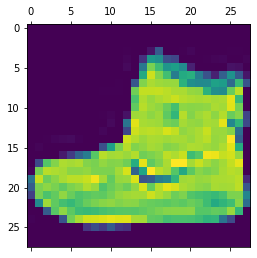

In [60]:
import matplotlib.pyplot as plt 

plt.matshow(train_data[0])

In [61]:
test_labels[0]

9

In [62]:
class_labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]


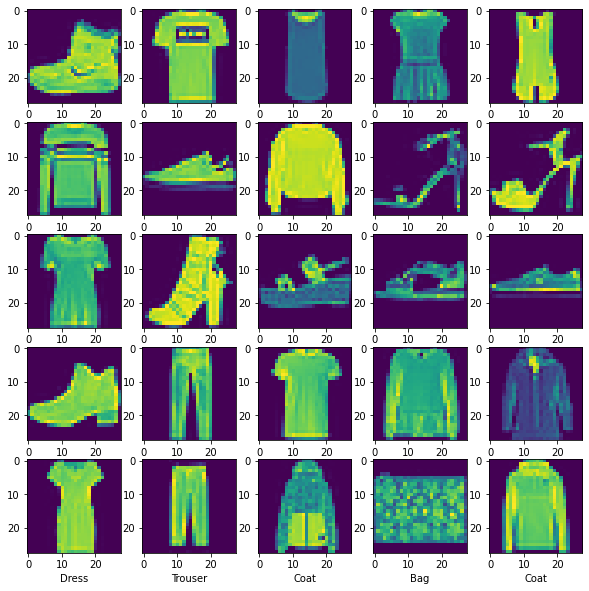

In [63]:
#visualizing data
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i])
    plt.xlabel(class_labels[train_labels[i]])

plt.show()

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(132 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

In [65]:
model.compile(optimizer="Adam" ,loss= "sparse_categorical_crossentropy", metrics="accuracy")

In [66]:
model.fit(train_data , train_labels , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.4910 - accuracy: 0.8276
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [67]:
metrics = model.evaluate(test_data , test_labels)

313/313 [==============================] - 6s 2ms/step - loss: 0.3335 - accuracy: 0.8826


In [68]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


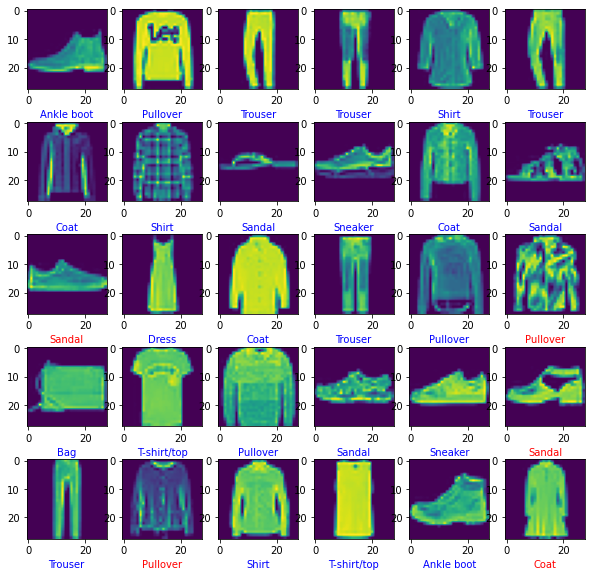

In [69]:
import numpy as np
plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(test_data[i])
    p = np.argmax(predictions[i])
    if( p == test_labels[i]):
        plt.xlabel(class_labels[p], color = 'blue')
    else:
        plt.xlabel(class_labels[p] , color = 'red')